In [3]:
##Import Statements
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error, r2_score
#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




import plotly.express as px



In [4]:
#Function to add ticker
def tickAdder(ticker):
    tick = yf.Ticker(ticker)
    tick = tick.history(start="1999-08-15", end="2024-06-07")
    return tick

In [5]:
#Function to plot Corr Matrix
def corrMatrix(dataframe):
    correlation_matrix = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

In [6]:
def timePlot(y, colName, ticker_symbol, start, end):
    y.plot()
    plt.xlim(start, end)
    plt.xlabel('Date')
    plt.ylabel( colName + ' Price')
    plt.title('Price of {}'.format(ticker_symbol))
    plt.grid(True)
    plt.show()
    

In [7]:
def linReg(X_train, y_train, X_test, y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    returns = 0
    for i in range(y_test.shape[0]):
        if y_pred[i] > 0:
            returns = returns + y_test[i]
        else:
            returns  = returns - y_test[i]
    return r2, mse, y_pred, lin_reg, returns

In [8]:
def rigReg(X_train, y_train, X_test, y_test):
    ridge_reg = Ridge(alpha=1.0, solver='svd',random_state=42)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    returns = 0
    for i in range(y_test.shape[0]):
        if y_pred[i] > 0:
            returns = returns + y_test[i]
        else:
            returns  = returns - y_test[i]
    return r2, mse, y_pred, ridge_reg, returns

In [9]:
def lassoReg(X_train, y_train, X_test, y_test):
    lasso_reg = Lasso(alpha=0.5,max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    returns = 0
    for i in range(y_test.shape[0]):
        if y_pred[i] > 0:
            returns = returns + y_test[i]
        else:
            returns  = returns - y_test[i]
    return r2, mse, y_pred, lasso_reg, returns

In [10]:
def iteration1(data):
    ##Feature Implementation 

#Adding Seasonality to our model 
    data["Seasonality"] = res.seasonal

#Rolling averages
    data['SMA_50'] = data['Daily_Change'].rolling(window=50).mean().shift(1)
    data['SMA_100'] = data['Daily_Change'].rolling(window=100).mean().shift(1)
    data['SMA_200'] = data['Daily_Change'].rolling(window=200).mean().shift(1)


# Calculate Technical Indicators (RSI)
    delta = data['Daily_Change'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

# Calculate lagged values
    data['Close_lag1'] = data['Daily_Change'].shift(1)
    data['Close_lag5'] = data['Daily_Change'].shift(5)

    data = data[202:]

    return data

In [11]:
def iteration2(data):

    msft = tickAdder("msft")
    nvda = tickAdder("nvda")
    amzn = tickAdder("amzn")
    msft["Daily_Change"] = (msft["Close"] - msft["Open"])/msft["Open"]
    nvda["Daily_Change"] = (nvda["Close"] - nvda["Open"])/nvda["Open"]
    amzn["Daily_Change"] = (amzn["Close"] - amzn["Open"])/amzn["Open"]

    data['SMA_50'] = data['Daily_Change'].rolling(window=50).mean().shift(1)
    data['SMA_100'] = data['Daily_Change'].rolling(window=100).mean().shift(1)
    data['SMA_200'] = data['Daily_Change'].rolling(window=200).mean().shift(1)
    
    data['Close_lag1'] = data['Daily_Change'].shift(1)
    data['Close_lag2'] = data['Daily_Change'].shift(2)
    data['msft'] = msft["Daily_Change"].shift(1)
    data['nvda'] = nvda["Daily_Change"].shift(1)
    data['amzn'] = amzn["Daily_Change"].shift(1)

    data = data[202:]

    return data

In [12]:
##Import Apple Data
data = yf.Ticker("aapl")
data = data.history(start="1999-08-15", end="2024-06-07")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-08-16 00:00:00-04:00,0.452118,0.458732,0.449756,0.457315,276931200,0.0,0.0
1999-08-17 00:00:00-04:00,0.455897,0.456371,0.445505,0.455897,320936000,0.0,0.0
1999-08-18 00:00:00-04:00,0.454008,0.468653,0.450701,0.454480,468574400,0.0,0.0
1999-08-19 00:00:00-04:00,0.452118,0.457315,0.442669,0.444087,550020800,0.0,0.0
1999-08-20 00:00:00-04:00,0.447866,0.448811,0.439835,0.447394,327947200,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,166.539993,169.300003,166.210007,169.020004,48251800,0.0,0.0
2024-04-25 00:00:00-04:00,169.529999,170.610001,168.149994,169.889999,50558300,0.0,0.0
2024-04-26 00:00:00-04:00,169.880005,171.339996,169.179993,169.300003,44525100,0.0,0.0


In [14]:
#Creating prediction feature
data["Daily_Change"] = (data["Close"] - data["Open"])/data["Open"]

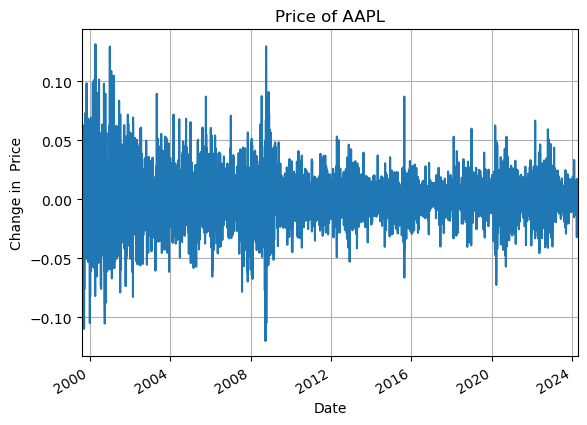

In [15]:
timePlot(data["Daily_Change"], "Change in ", "AAPL", "1999-08-15", "2024-04-10")

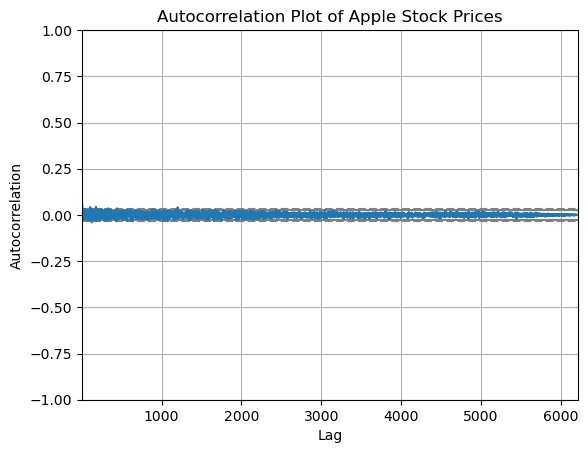

In [16]:
close_prices = data['Daily_Change']

# Calculate autocorrelation using pandas autocorr() function
autocorr_values = close_prices.autocorr()

# Plot autocorrelation function (ACF)
pd.plotting.autocorrelation_plot(close_prices)
plt.title('Autocorrelation Plot of Apple Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [17]:
#Naive Seasonal Decomposition 
#Identify Trend, seasonal, and residual components of close
result = seasonal_decompose(data['Daily_Change'], model='additive', period=1)

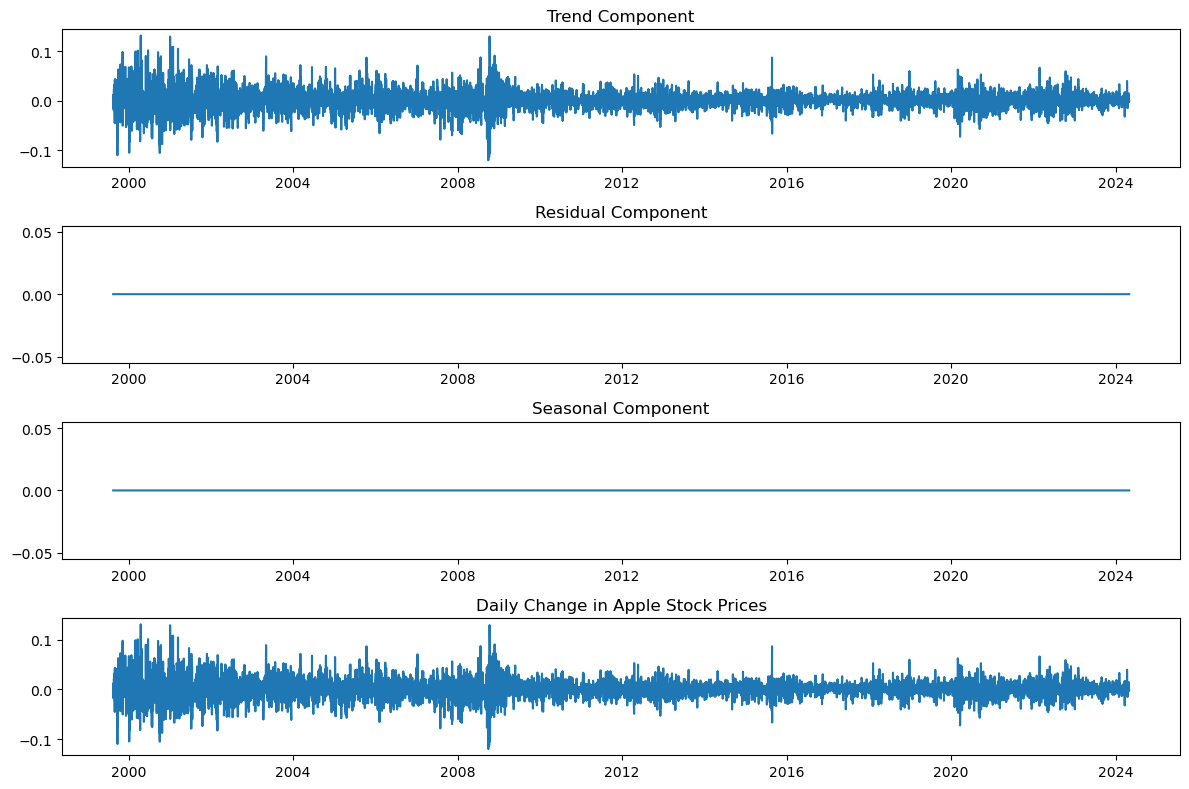

In [18]:
# Simple Seasonal Decomposition Model
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 2)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
# (Similar blocks for Seasonal and Residual components)

plt.subplot(4, 1, 4)

# SHOULD TREND AND SEASONALITY OCCUR W.R.T to the Y-VARIABLE
plt.plot(data['Daily_Change'], label= "Apple Stock Price")
plt.title("Daily Change in Apple Stock Prices")
plt.tight_layout()
plt.show()

In [ ]:
#Complex Seasonal Decomposition Model 
from statsmodels.tsa.seasonal import STL
stl = STL(data["Daily_Change"], period = 365)
res = stl.fit()
fig = res.plot()



In [21]:
data = iteration1(data)

NameError: name 'res' is not defined

In [443]:
#Ensure that there exist no null values
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,Seasonality,SMA_50,SMA_100,SMA_200,RSI,Close_lag1,Close_lag5
Date,,,,,,,,,,,,,,,
2001-03-22 00:00:00-05:00,0.308026,0.328813,0.305192,0.326924,723301600,0.0,0.0,0.061351,0.038430,0.008931,0.002138,-0.000591,50.682294,0.017376,-0.056885
2001-03-23 00:00:00-05:00,0.333537,0.356214,0.332593,0.347710,944888000,0.0,0.0,0.042493,0.023823,0.009712,0.002917,-0.000333,49.402190,0.061351,0.032893
2001-03-26 00:00:00-05:00,0.349676,0.359049,0.319440,0.329267,734451200,0.0,0.0,-0.058365,-0.033880,0.010712,0.003508,-0.000278,44.346781,0.042493,0.041139
2001-03-27 00:00:00-05:00,0.331686,0.348466,0.331080,0.345745,543821600,0.0,0.0,0.042388,0.024406,0.007391,0.002826,-0.000425,52.490584,-0.058365,-0.049773
2001-03-28 00:00:00-05:00,0.333802,0.340152,0.325034,0.335163,584662400,0.0,0.0,0.004076,0.007749,0.009008,0.003345,-0.000162,49.895321,0.042388,0.017376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,165.520004,167.259995,164.770004,165.839996,48116400,0.0,0.0,0.001933,-0.013080,-0.001279,0.000111,0.000328,50.963617,-0.007280,-0.015226
2024-04-23 00:00:00-04:00,165.350006,167.050003,164.919998,166.899994,49537800,0.0,0.0,0.009374,0.009931,-0.001128,0.000137,0.000286,51.223293,0.001933,-0.013799
2024-04-24 00:00:00-04:00,166.539993,169.300003,166.210007,169.020004,48251800,0.0,0.0,0.014891,0.003709,-0.000961,0.000198,0.000352,57.056431,0.009374,-0.009492


In [444]:
data.drop(columns=["Low", "Dividends","Stock Splits", "High", "Volume","Close", "Open" ], inplace=True)

In [445]:
data

,Daily_Change,Seasonality,SMA_50,SMA_100,SMA_200,RSI,Close_lag1,Close_lag5
Date,,,,,,,,
2001-03-22 00:00:00-05:00,0.061351,0.038430,0.008931,0.002138,-0.000591,50.682294,0.017376,-0.056885
2001-03-23 00:00:00-05:00,0.042493,0.023823,0.009712,0.002917,-0.000333,49.402190,0.061351,0.032893
2001-03-26 00:00:00-05:00,-0.058365,-0.033880,0.010712,0.003508,-0.000278,44.346781,0.042493,0.041139
2001-03-27 00:00:00-05:00,0.042388,0.024406,0.007391,0.002826,-0.000425,52.490584,-0.058365,-0.049773
2001-03-28 00:00:00-05:00,0.004076,0.007749,0.009008,0.003345,-0.000162,49.895321,0.042388,0.017376
...,...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,0.001933,-0.013080,-0.001279,0.000111,0.000328,50.963617,-0.007280,-0.015226
2024-04-23 00:00:00-04:00,0.009374,0.009931,-0.001128,0.000137,0.000286,51.223293,0.001933,-0.013799
2024-04-24 00:00:00-04:00,0.014891,0.003709,-0.000961,0.000198,0.000352,57.056431,0.009374,-0.009492


In [446]:
#Training and test split
target = "Daily_Change"
y = data[target]
X = data.drop(columns= target)                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.7)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [447]:
#Linear Regression Iteration 1 
r2, mse, y_pred, model, returns = linReg(X_train, y_train, X_test, y_test)

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]


In [448]:
r2, mse, returns

(0.5135928888816712, 0.00010140581468440773, 14.625280907108614)

In [449]:
#Ridge Regression Iteration 1
r2, mse, y_pred, model, returns = rigReg(X_train, y_train, X_test, y_test)

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]


In [450]:
r2, mse, returns

(0.4324943604470102, 0.00011831317923077591, 14.161973554366089)

In [451]:
#Lasso Regression Iteration 1
r2, mse, y_pred, model, returns = lassoReg(X_train, y_train, X_test, y_test)

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/615297779.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]


In [452]:
r2, mse, returns

(-0.0017519585031207097, 0.00020884454840751213, 1.5963092565657844)

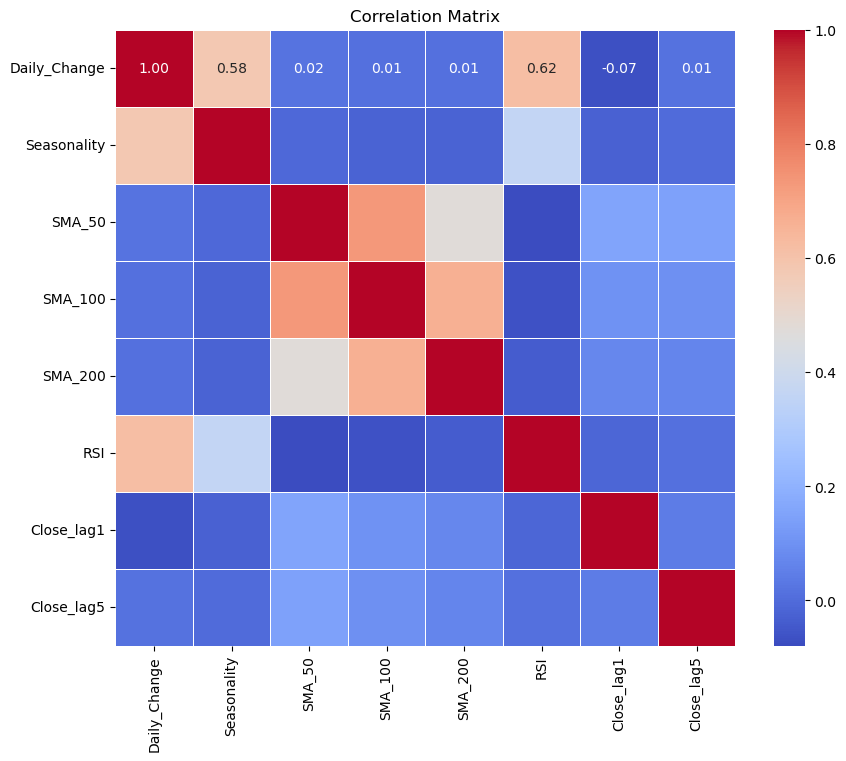

In [453]:
corrMatrix(data)

In [454]:
data = tickAdder('aapl')

In [455]:
data = tickAdder('aapl')
data["Daily_Change"] = (data["Close"] - data["Open"])/data["Open"]
data.drop(columns=["Low", "Dividends","Stock Splits", "High", "Volume","Close", "Open"], inplace=True)
data = iteration2(data)
data

,Daily_Change,SMA_50,SMA_100,SMA_200,Close_lag1,Close_lag2,msft,nvda,amzn
Date,,,,,,,,,
2000-06-02 00:00:00-04:00,-0.012667,-0.005445,-0.000740,0.000864,0.090214,-0.033094,0.002913,-0.001596,0.026854
2000-06-05 00:00:00-04:00,-0.021433,-0.007417,-0.000450,0.000795,-0.012667,0.090214,0.004735,0.098643,0.105012
2000-06-06 00:00:00-04:00,0.009853,-0.007749,-0.000332,0.000777,-0.021433,-0.012667,0.013018,0.022954,-0.009654
2000-06-07 00:00:00-04:00,0.031374,-0.007025,0.000588,0.000831,0.009853,-0.021433,0.021082,-0.053290,-0.063657
2000-06-08 00:00:00-04:00,-0.028810,-0.006679,0.000662,0.000872,0.031374,0.009853,0.018051,-0.037475,-0.001205
...,...,...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,0.001933,-0.001279,0.000111,0.000328,-0.007280,-0.005892,-0.012153,-0.083584,-0.022994
2024-04-23 00:00:00-04:00,0.009374,-0.001128,0.000137,0.000286,0.001933,-0.007280,0.002200,0.018104,0.001639
2024-04-24 00:00:00-04:00,0.014891,-0.000961,0.000198,0.000352,0.009374,0.001933,0.008238,0.020478,0.008199


In [456]:
target = "Daily_Change"
y = data[target]
X = data.drop(columns= target)                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.7)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [457]:
r2, mse, y_pred, model, returns = linReg(X_train, y_train, X_test, y_test)

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]


In [458]:
r2, mse, returns

(0.0018525542313924115, 0.00020324343803253126, 1.7130331062064328)

In [459]:
r2, mse, y_pred, model, returns = rigReg(X_train, y_train, X_test, y_test)
r2, mse, returns

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]


(0.0023858209447539247, 0.00020313485391435174, 1.5204412021800766)

In [460]:
r2, mse, y_pred, model, returns = lassoReg(X_train, y_train, X_test, y_test)
r2, mse, returns

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/615297779.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]


(-0.0022975320691738244, 0.00020408848132892453, 1.6763720227111985)

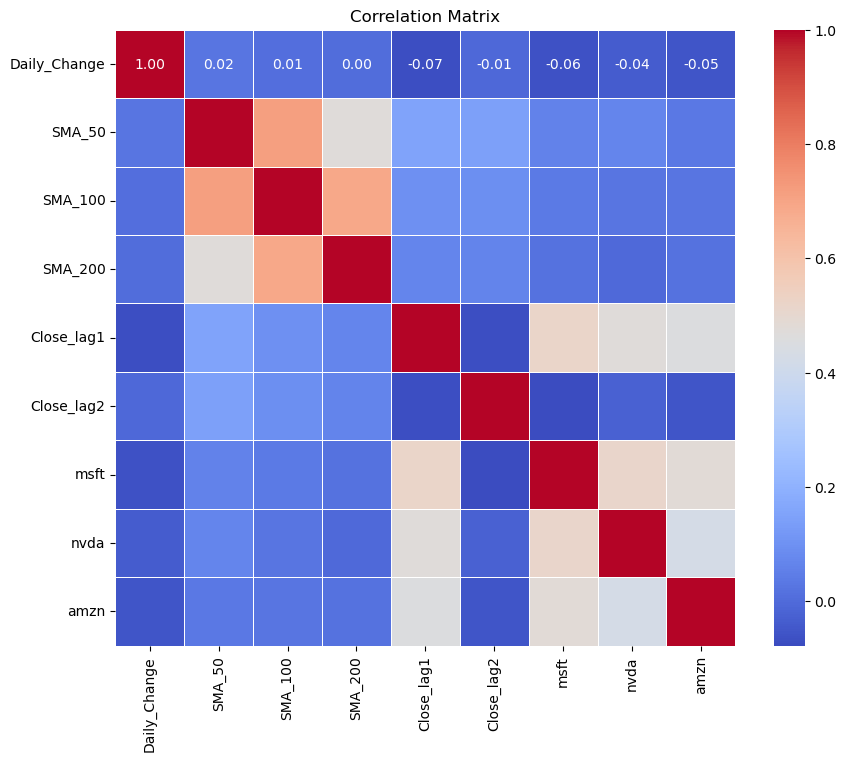

In [461]:
corrMatrix(data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-08-16 00:00:00-04:00,65.080158,66.577002,64.819837,66.316681,5113894,0.0,0.0
1999-08-17 00:00:00-04:00,66.902443,66.934984,65.893700,66.902443,5372674,0.0,0.0
1999-08-18 00:00:00-04:00,66.837331,67.488133,64.299203,64.494446,6910922,0.0,0.0
1999-08-19 00:00:00-04:00,64.494441,65.015079,63.127758,64.006340,7932132,0.0,0.0
1999-08-20 00:00:00-04:00,64.754768,64.754768,63.030140,63.388081,6236252,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,182.449997,183.320007,180.449997,181.899994,3076500,0.0,0.0
2024-04-23 00:00:00-04:00,182.729996,184.679993,179.000000,182.190002,5950200,0.0,0.0
2024-04-24 00:00:00-04:00,183.169998,184.289993,181.399994,184.100006,7616600,0.0,0.0


In [548]:
data = tickAdder('aapl')
data["Daily_Change"] = (data["Close"] - data["Open"])/data["Open"]
data.drop(columns=["Low", "Dividends","Stock Splits", "High", "Volume","Close", "Open" ], inplace=True)

msft = tickAdder("msft")
nvda = tickAdder("nvda")
amzn = tickAdder("amzn")

msft["Daily_Change"] = (msft["Close"] - msft["Open"])/msft["Open"]
nvda["Daily_Change"] = (nvda["Close"] - nvda["Open"])/nvda["Open"]
amzn["Daily_Change"] = (amzn["Close"] - amzn["Open"])/amzn["Open"]

data['Close_lag1'] = data['Daily_Change'].shift(1)
data['Close_lag2'] = data['Daily_Change'].shift(2)
data['Close_lag3'] = data['Daily_Change'].shift(3)
data['Close_lag4'] = data['Daily_Change'].shift(4)
data['Close_lag5'] = data['Daily_Change'].shift(5)
data['Close_lag6'] = data['Daily_Change'].shift(6)

data['Close_lag4'] = data['Daily_Change'].shift(4)
data['msft'] = msft["Daily_Change"].shift(1)
data['nvda'] = nvda["Daily_Change"].shift(1)
data['amzn'] = amzn["Daily_Change"].shift(1)


data = data[202:]

target = "Daily_Change"
y = data[target]
X = data.drop(columns= target)                                             
#Split the data into train and test sets
cutoff = int(len(X) * 0.7)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

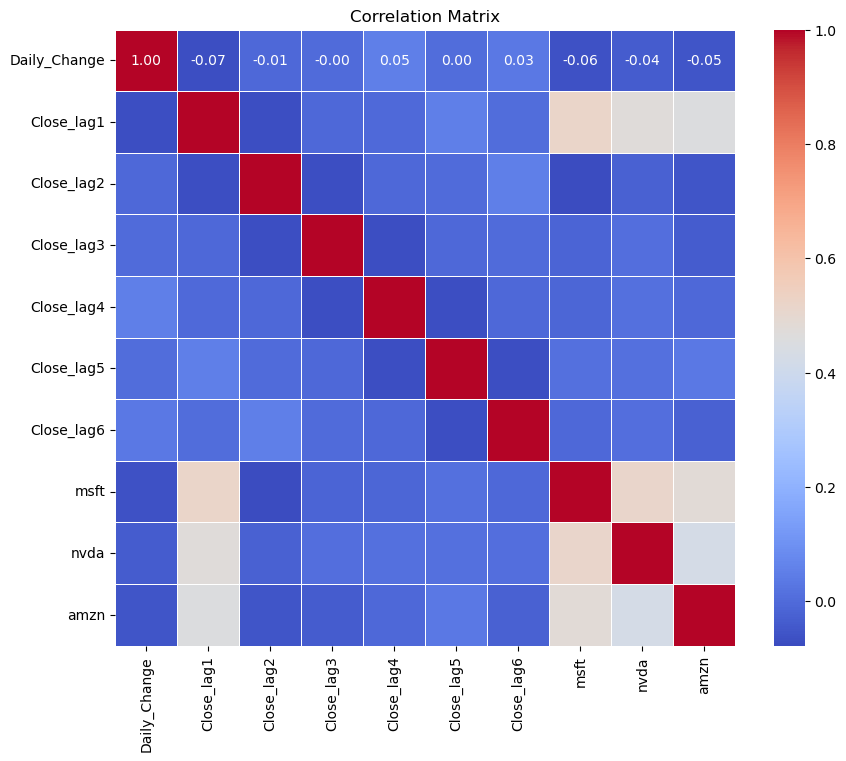

In [549]:
corrMatrix(data)

In [550]:
r2, mse, y_pred, model, returns = linReg(X_train, y_train, X_test, y_test)

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/3655467641.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]


In [551]:
r2, mse, returns

(0.0010571924970118607, 0.00020340539011091442, 1.8705868771814151)

In [552]:
r2, mse, y_pred, model, returns = rigReg(X_train, y_train, X_test, y_test)
r2, mse, returns

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]
/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/2566637789.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns  = returns - y_test[i]


(0.0025202003723512334, 0.0002031074914871057, 2.2729242179631095)

In [553]:
r2, mse, y_pred, model, returns = lassoReg(X_train, y_train, X_test, y_test)
r2, mse, returns

/var/folders/xk/v8z12vfx3c5gp782bqrr8gf80000gq/T/ipykernel_99699/615297779.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  returns = returns + y_test[i]


(-0.0022975320691738244, 0.00020408848132892453, 1.6763720227111958)